There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','bar', etc..)
___

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel('my new dataframe.xlsx')

In [34]:
df = df[['DPOM Line Item Status','Status','Block','GAC','Destination Country Name','Total Item Quantity','Silh Desc','Embellishments','SAM','HT','Print','Emb','Pad Print']]

In [51]:
df['GAC Year'] = df['GAC'].dt.year
df['GAC Month'] = df['GAC'].dt.month

In [57]:
df.insert(4, 'GAC Year', df.pop('GAC Year'))
df.insert(5, 'GAC Month', df.pop('GAC Month'))

In [60]:
df.head()

,DPOM Line Item Status,Status,Block,GAC,GAC Year,GAC Month,Destination Country Name,Total Item Quantity,Silh Desc,Embellishments,SAM,HT,Print,Emb,Pad Print
0,Closed,C,B,2022-01-05,2022,1,USA,1182,SHORT SLEEVE T-SHIRT,PRINT & HT,4.550000,1,1,0,0
1,Closed,C,B,2022-01-05,2022,1,USA,344,SHORT SLEEVE T-SHIRT,PRINT & HT,4.550000,1,1,0,0
2,Closed,C,A,2022-01-05,2022,1,USA,20,TANK TOP/SINGLET,EMB & HT,3.483333,1,0,1,0
3,Closed,C,A,2022-01-05,2022,1,Canada,100,TANK TOP/SINGLET,EMB & HT,3.483333,1,0,1,0
4,Closed,C,A,2022-01-05,2022,1,USA,579,HOODED FULL ZIP LS TOP,EMB,18.333333,0,0,1,0


In [114]:
group = pd.pivot_table(df, values = 'Total Item Quantity',
                       index = ['GAC Year','GAC Month'],
                       columns = 'Block',
                       aggfunc = 'sum')

group.fillna(0, inplace=True)

group.head()

Block                 0         A         B
GAC Year GAC Month                         
2022     1          0.0  523305.0  414437.0
         2          0.0  574367.0  395564.0
         3          0.0  475723.0  547956.0
         4          0.0  430485.0  501766.0
         5          0.0  335462.0  299205.0

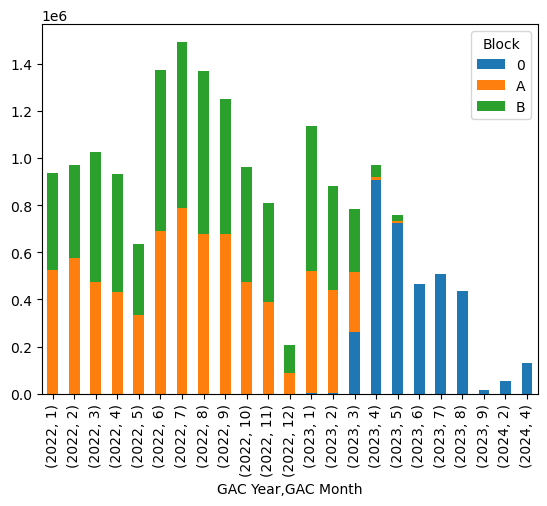

In [128]:
group.plot.bar(stacked = True)
plt.show()

<Axes: ylabel='GAC Year,GAC Month'>

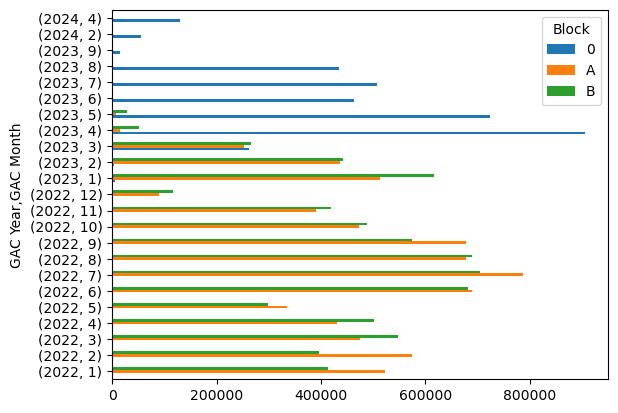

In [115]:
group.plot.barh()

<Axes: xlabel='GAC Year,GAC Month'>

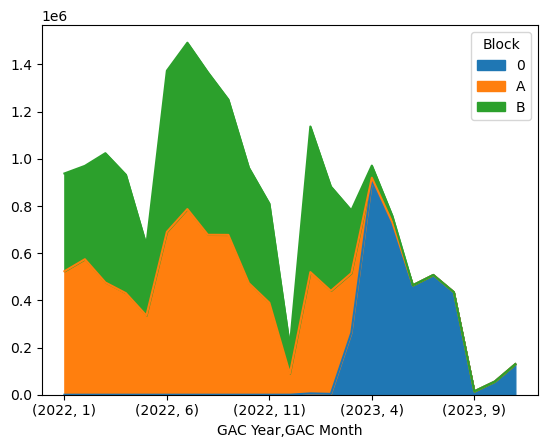

In [112]:
group.plot.area()

<Axes: >

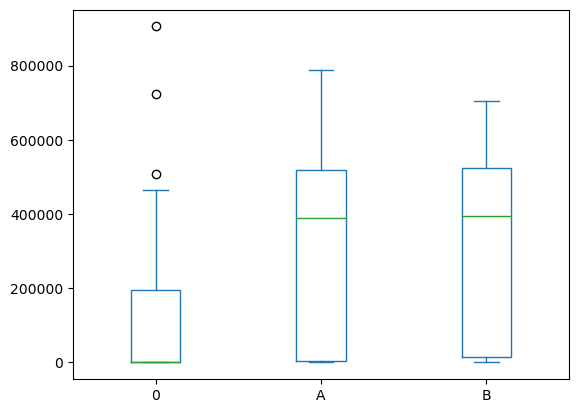

In [123]:
group.plot.box()

<Axes: xlabel='GAC Year,GAC Month'>

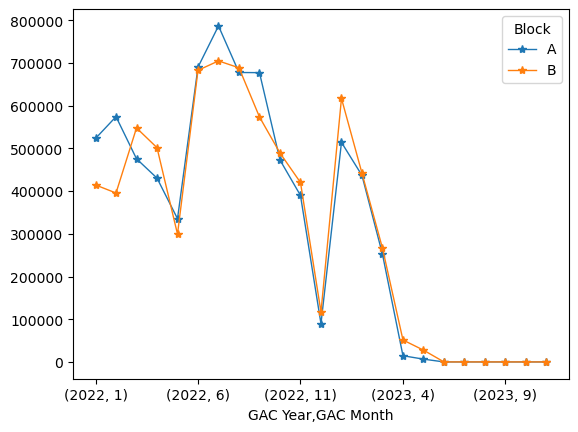

In [138]:
group.plot.line(y = ['A','B'], lw = 1, marker = '*')

<Axes: xlabel='A', ylabel='B'>

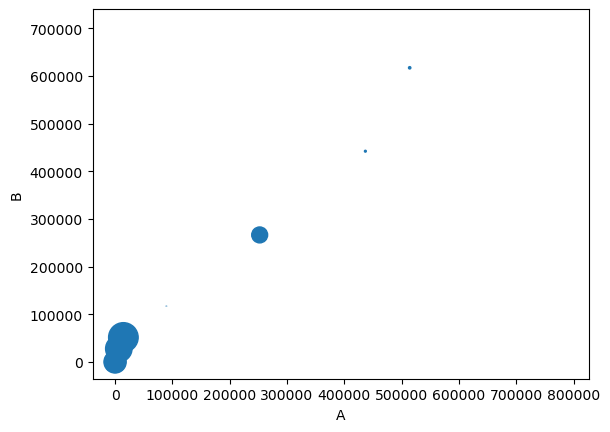

In [170]:
group.plot.scatter(x = 'A', y = 'B', s = group[0]/2000) #using s to consider the size when plotting

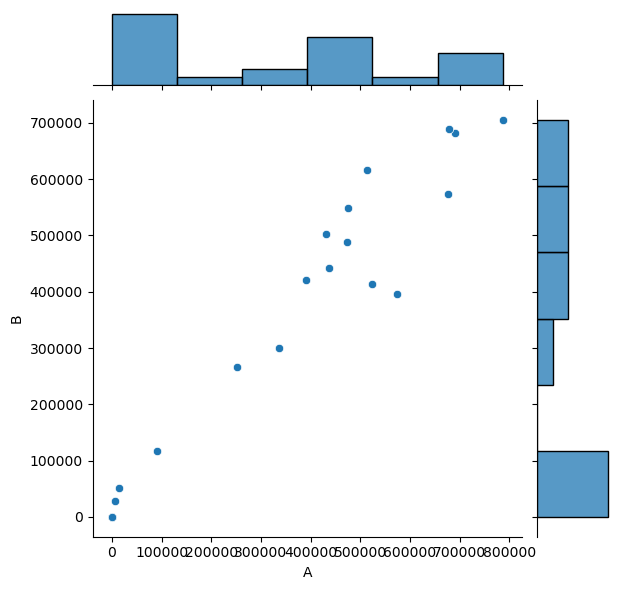

In [177]:
sns.jointplot(group,x = 'A', y = 'B')

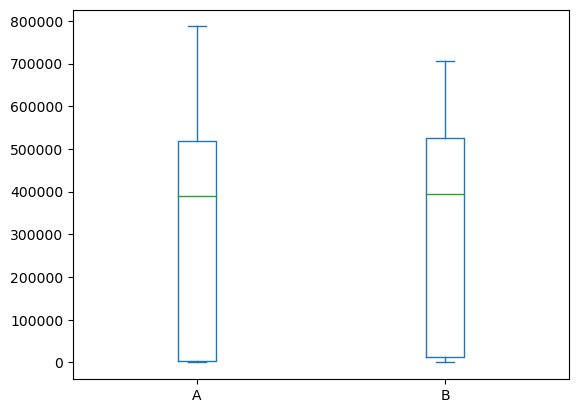

In [178]:
group[['A','B']].plot.box()
plt.show()

<Axes: xlabel='A', ylabel='B'>

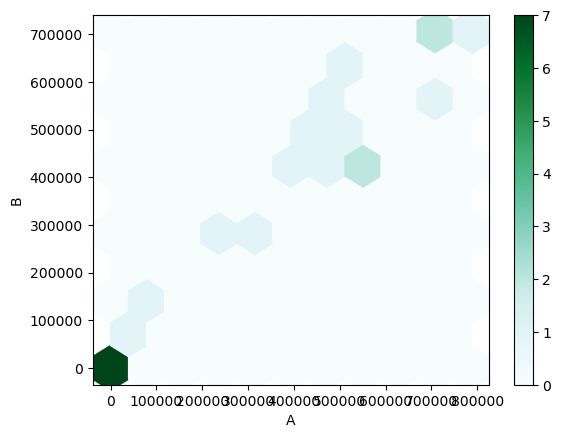

In [186]:
group.plot.hexbin(x = 'A',y = 'B', gridsize=10) #use grid size to inlarge the scatter grid

<Axes: ylabel='Density'>

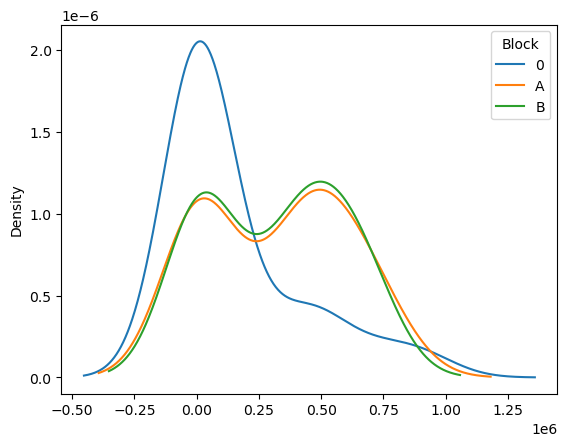

In [190]:
group.plot.kde()
